In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Kmean_dataset.csv')
x_train=df
x_train=x_train.to_numpy()

In [3]:
x_train1=x_train
x_train1.shape

(178, 13)

In [4]:
def mag(x):
    if x<0:
        return -x
    return x

In [5]:
def distance(centroids,points):
    m,n=centroids.shape
    p=centroids.reshape(m,1,n)
    d=(p-points)**2
    s=d.sum(2)
    return s

In [6]:
def point_as(d):
    m,n=d.shape
    tl=[]
    for i in range(m):
        c=np.argmin(d,axis=0)
        indice=np.where(c==i)
        indice=np.array(indice)
        tl.append(indice)
    return tl   

In [7]:
def newpoint(x,tl):
    new=[]
    for i in range(len(tl)):
        x_new=x[tl[i]]
        x_avg=np.mean(x_new,axis=1)
        #print("x_avg",x_avg.shape)
        new.append(x_avg.reshape(-1,))
    return np.array(new)
        
        

In [8]:
def update(x,num,iter):
    m,n=x.shape
    np.random.seed(20)
    xe=np.random.permutation(x)
    centroids=xe[:num]
    dis=[]
    for i in range(iter):
        d=distance(centroids,x)
        tl=point_as(d)
        centroids=newpoint(x,tl)
        di=0
        for j in range(num):
            p=distance(centroids[j].reshape(1,-1),x[tl[j]]).sum()/(2*m)
            di+=p
        dis.append([di,i])
        if i%(iter//10)==0 and iter!=500:
            print("epoch",i,"distortion",di)
    return centroids,np.array(dis)

In [9]:
new=[]
q=[]
for i in range(1,10):    
    p,d=update(x_train1,i,500)
    new.append(p)
    q.append(2*178*d[-1][0])

In [10]:
q

[17592296.383508474,
 4545746.292099379,
 2370689.686782968,
 1341379.5700647032,
 1061573.2774376583,
 684050.7480527544,
 625842.0958674412,
 556900.3994574251,
 544882.8090177993]

In [11]:
c_min=10*q[1]
for i in range(len(q)-1):
    c=mag(q[i+1]-2*q[i]+q[i-1])
    if c<c_min:
        c_min=c
        m=i
    print(q[i+1],q[i],c,i)
print("optimal k :",m)

4545746.292099379 17592296.383508474 30093963.66589977 0
2370689.686782968 4545746.292099379 10871493.486092683 1
1341379.5700647032 2370689.686782968 1145746.4885981455 2
1061573.2774376583 1341379.5700647032 749503.82409122 3
684050.7480527544 1061573.2774376583 97716.23675785889 4
625842.0958674412 684050.7480527544 319313.87719959056 5
556900.3994574251 625842.0958674412 10733.044224702753 6
544882.8090177993 556900.3994574251 56924.10597039026 7
optimal k : 6


Text(0, 0.5, 'sum of squared distances')

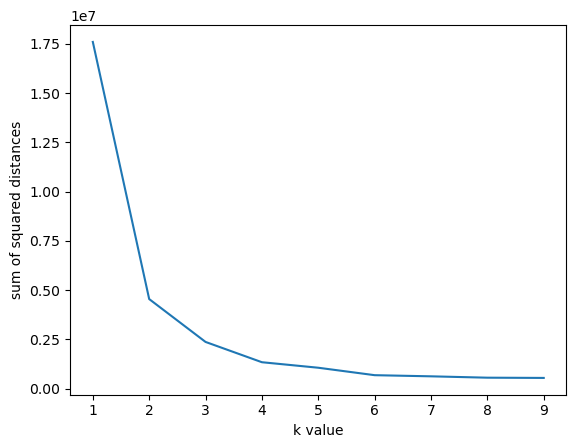

In [12]:
plt.plot(np.arange(9)+1,q)
plt.xlabel('k value')
plt.ylabel('sum of squared distances')

In [13]:
num=m
new,d=update(x_train1,num,1000)

epoch 0 distortion 7272.027094765476
epoch 100 distortion 1921.490865316726
epoch 200 distortion 1921.490865316726
epoch 300 distortion 1921.490865316726
epoch 400 distortion 1921.490865316726
epoch 500 distortion 1921.490865316726
epoch 600 distortion 1921.490865316726
epoch 700 distortion 1921.490865316726
epoch 800 distortion 1921.490865316726
epoch 900 distortion 1921.490865316726


Text(0, 0.5, 'distortion')

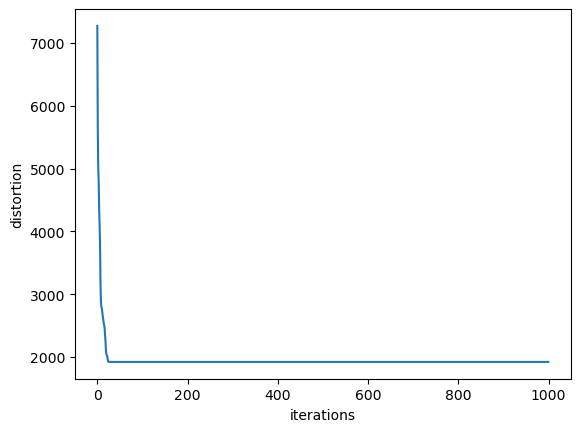

In [14]:
xl=d[:,1]
yl=d[:,0]

plt.plot(xl,yl)
plt.xlabel('iterations')
plt.ylabel('distortion')

In [15]:
d=distance(new,x_train1)
tl=point_as(d)

Text(0, 0.5, 'x2')

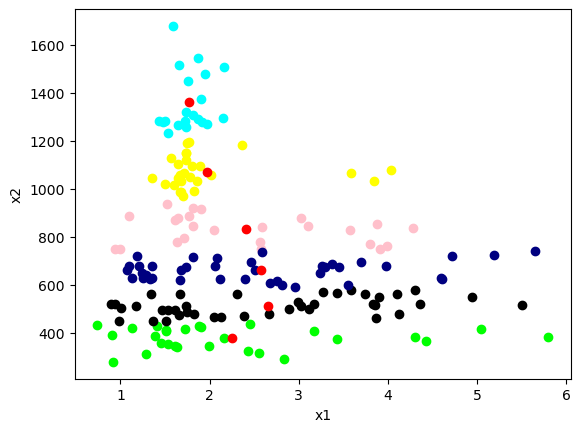

In [16]:
color=['lime','pink','cyan','yellow','black','navy','lightcoral','maroon','peru']
for i in range(num):
    c=x_train[tl[i]]
    c=np.squeeze(c,axis=0)
    cx=c[:,1]
    cy=c[:,-1]
    plt.scatter(cx,cy,c=color[i])
    
plt.scatter(new[:,1],new[:,-1],c='red')
plt.xlabel('x1')
plt.ylabel('x2')